In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from PyEMD import EMD
from utils.kde import smooth
wl = [i for i in range(660, 921)]
%matplotlib inline

### 觀察穩定(30sec)

In [8]:
date = "20190528"
data = np.loadtxt("data/raw/{}/IJV/live/live_1_1.csv".format(date), delimiter=",")
calib_wl = np.loadtxt("data/raw/{}/IJV/calib_wl.csv".format(date), delimiter=",")

In [3]:
data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp

In [4]:
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (3639, 261)


### 確認各波長隨時間改變趨勢一樣

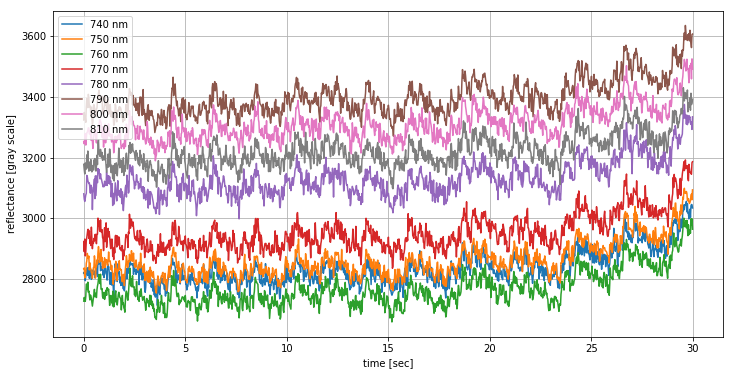

In [5]:
plt.figure(figsize=(12, 6))
for i in range(740, 811, 10):
    plt.plot(data[:1200, i-660], label="{} nm".format(i))
plt.xlabel("time [sec]")
plt.ylabel("reflectance [gray scale]")
plt.grid()
plt.legend()
plt.xticks([i for i in range(0, 1201, 200)], labels=[str(int(i/20)) for i in range(0, 1201, 100)])
plt.show()

### 確認一樣後，直接計算平均

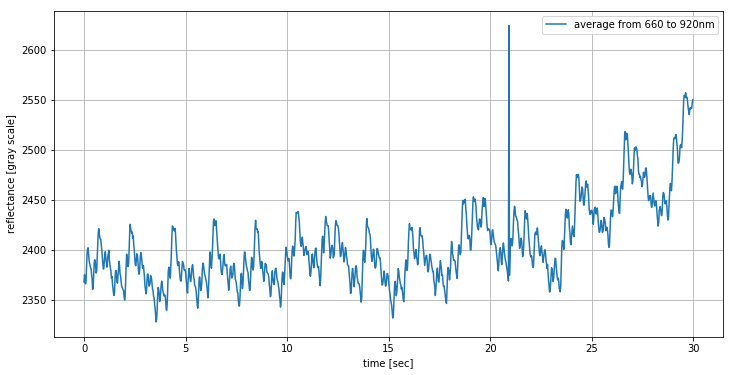

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1)[:1200], label="average from 660 to 920nm")
plt.xlabel("time [sec]")
plt.ylabel("reflectance [gray scale]")
plt.grid()
plt.legend()
plt.xticks([i for i in range(0, 1201, 200)], labels=[str(int(i/20)) for i in range(0, 1201, 100)])
plt.show()

# 過度換氣

In [47]:
data = np.loadtxt("data/raw/{}/IJV/live/live_2_1.csv".format(date), delimiter=",")
calib_wl = np.loadtxt("data/raw/{}/IJV/calib_wl.csv".format(date), delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (13302, 261)


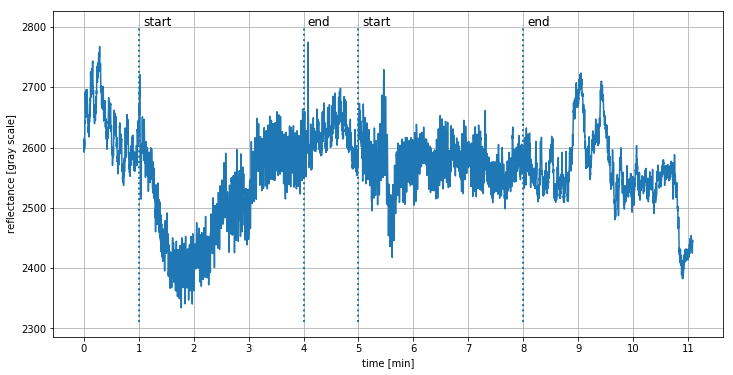

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
total_time = 13300
for text, time in zip(["start", "end"]*2, [1200, 4800, 6000, 9600]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, total_time, 1200)], labels=[str(int(i/1200)) for i in range(0, total_time, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

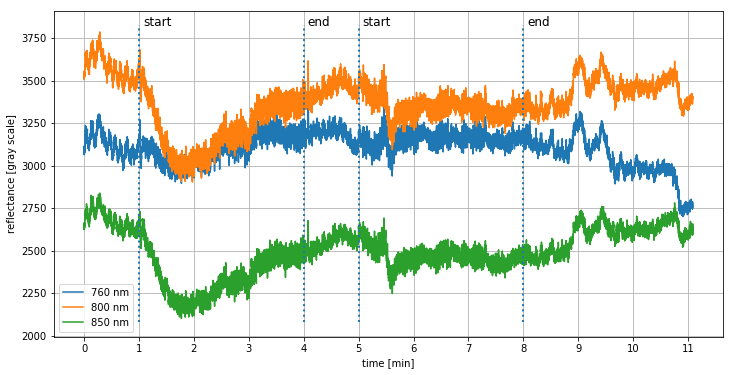

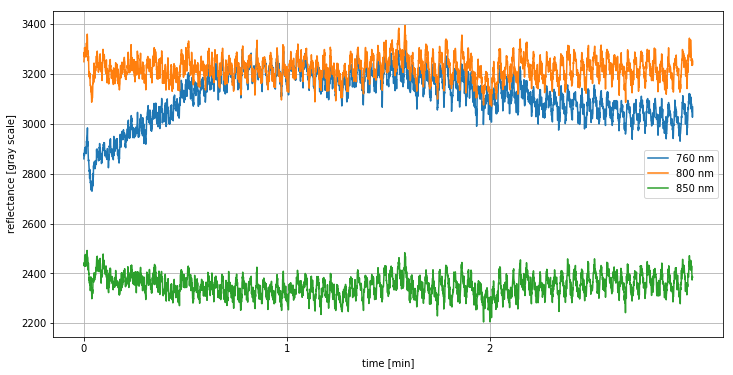

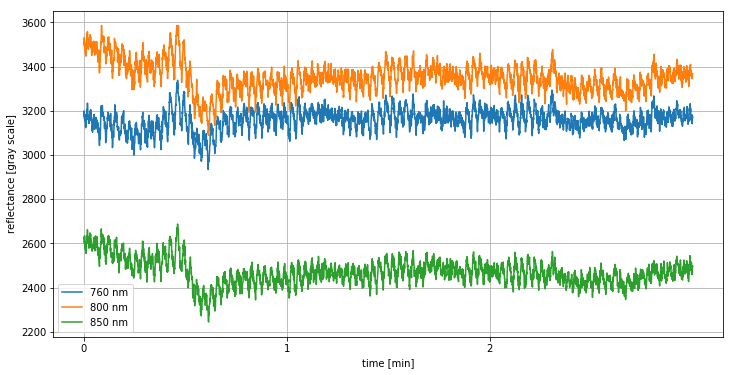

In [49]:
plt.figure(figsize=(12, 6))
base = 660
s_time1 = 1200
e_time1 = 4800
s_time2 = 6000
e_time2 = 9600
total_time = 13300

wl_select = [760, 800, 850]
wl_select = [i-base for i in wl_select]
for i in wl_select:
    plt.plot(data[:, i], label="{} nm".format(i+base))
    
    
for text, time in zip(["start", "end"]*2, [s_time1, e_time1, s_time2, e_time2]):
    plt.plot(
        [time, time], 
        [data[:, wl_select].min()*0.99, data[:, wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[:, wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, total_time, 1200)], labels=[str(int(i/1200)) for i in range(0, total_time, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

# 去除800 nm的變化
plt.figure(figsize=(12, 6))
imf = EMD().emd(data[s_time1:e_time1, 800-base])
ratio = imf[-1]/imf[-1].mean()
plt.plot(data[s_time1:e_time1, 760-base]/ratio, label="760 nm")
plt.plot(data[s_time1:e_time1, 800-base]/ratio, label="800 nm")
plt.plot(data[s_time1:e_time1, 850-base]/ratio, label="850 nm")

plt.xticks(
    [i for i in range(0, e_time1-s_time1, 1200)], 
    labels=[str(int(i/1200)) for i in range(0, e_time1-s_time1, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

plt.figure(figsize=(12, 6))
imf = EMD().emd(data[s_time2:e_time2, 800-base])
ratio = imf[-1]/imf[-1].mean()
plt.plot(data[s_time2:e_time2, 760-base]/ratio, label="760 nm")
plt.plot(data[s_time2:e_time2, 800-base]/ratio, label="800 nm")
plt.plot(data[s_time2:e_time2, 850-base]/ratio, label="850 nm")

plt.xticks(
    [i for i in range(0, e_time2-s_time2, 1200)], 
    labels=[str(int(i/1200)) for i in range(0, e_time2-s_time2, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

In [20]:
data = np.loadtxt("data/raw/{}/IJV/live/live_2_2.csv".format(date), delimiter=",")
calib_wl = np.loadtxt("data/raw/{}/IJV/calib_wl.csv".format(date), delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (76140, 261)


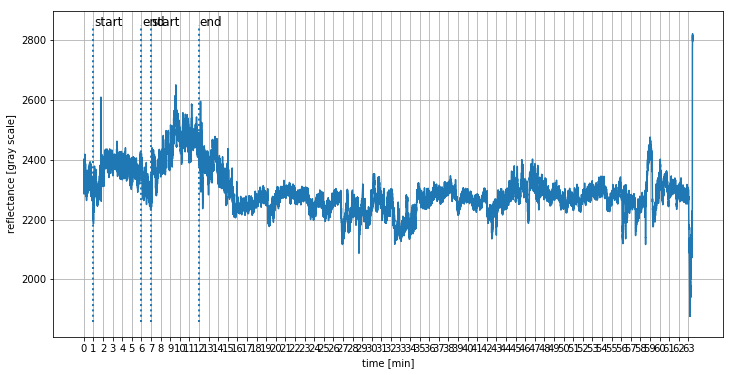

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"]*2, [1200, 7200, 8400, 14400]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 76140, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 76140, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

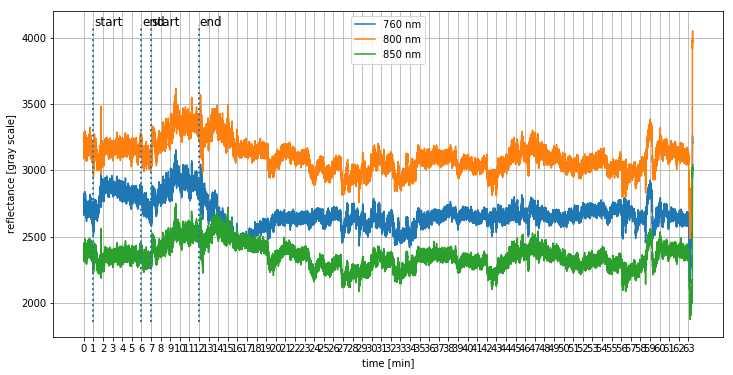

In [21]:
plt.figure(figsize=(12, 6))
base = 660
s_time = 600
e_time = 10200
total_time = 76140

wl_select = [760, 800, 850]
wl_select = [i-base for i in wl_select]
for i in wl_select:
    plt.plot(data[:, i], label="{} nm".format(i+base))
    
    
for text, time in zip(["start", "end"]*2, [1200, 7200, 8400, 14400]):
    plt.plot(
        [time, time], 
        [data[:, wl_select].min()*0.99, data[:, wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[:, wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, total_time, 1200)], labels=[str(int(i/1200)) for i in range(0, total_time, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

In [42]:
data = np.loadtxt("data/raw/{}/IJV/live/live_2_3.csv".format(date), delimiter=",")
calib_wl = np.loadtxt("data/raw/{}/IJV/calib_wl.csv".format(date), delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (18088, 261)


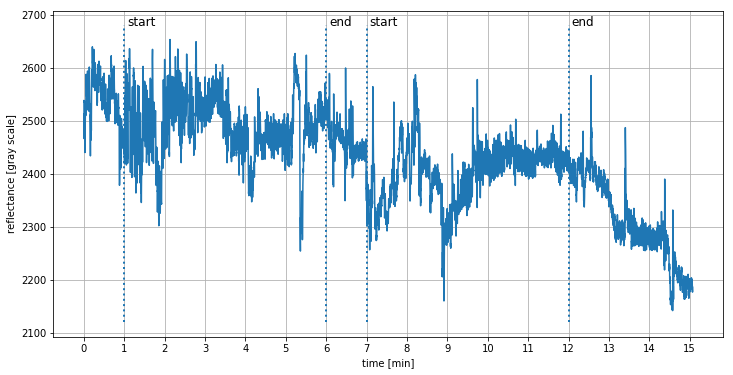

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"]*2, [1200, 7200, 8400, 14400]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 18088, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 18088, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

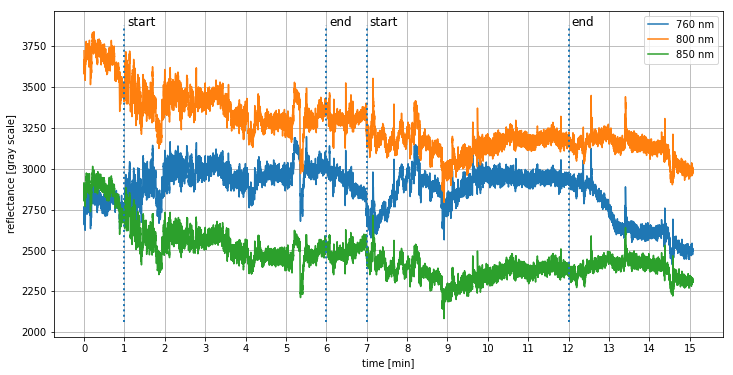

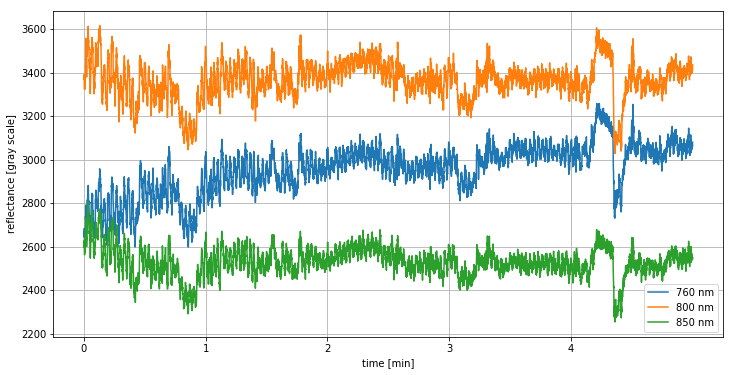

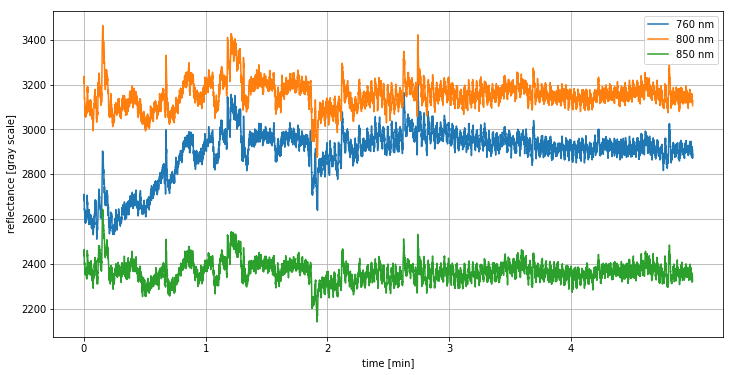

In [45]:
plt.figure(figsize=(12, 6))
base = 660
s_time1 = 1200
e_time1 = 7200
s_time2 = 8400
e_time2 = 14400
total_time = 18088

wl_select = [760, 800, 850]
wl_select = [i-base for i in wl_select]
for i in wl_select:
    plt.plot(data[:, i], label="{} nm".format(i+base))
    
    
for text, time in zip(["start", "end"]*2, [s_time1, e_time1, s_time2, e_time2]):
    plt.plot(
        [time, time], 
        [data[:, wl_select].min()*0.99, data[:, wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[:, wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, total_time, 1200)], labels=[str(int(i/1200)) for i in range(0, total_time, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

# 去除800 nm的變化
plt.figure(figsize=(12, 6))
imf = EMD().emd(data[s_time1:e_time1, 800-base])
ratio = imf[-1]/imf[-1].mean()
plt.plot(data[s_time1:e_time1, 760-base]/ratio, label="760 nm")
plt.plot(data[s_time1:e_time1, 800-base]/ratio, label="800 nm")
plt.plot(data[s_time1:e_time1, 850-base]/ratio, label="850 nm")

plt.xticks(
    [i for i in range(0, e_time1-s_time1, 1200)], 
    labels=[str(int(i/1200)) for i in range(0, e_time1-s_time1, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

plt.figure(figsize=(12, 6))
imf = EMD().emd(data[s_time2:e_time2, 800-base])
ratio = imf[-1]/imf[-1].mean()
plt.plot(data[s_time2:e_time2, 760-base]/ratio, label="760 nm")
plt.plot(data[s_time2:e_time2, 800-base]/ratio, label="800 nm")
plt.plot(data[s_time2:e_time2, 850-base]/ratio, label="850 nm")

plt.xticks(
    [i for i in range(0, e_time2-s_time2, 1200)], 
    labels=[str(int(i/1200)) for i in range(0, e_time2-s_time2, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

# 吸氧氣

In [28]:
data = np.loadtxt("data/raw/{}/IJV/live/live_3_1.csv".format(date), delimiter=",")
calib_wl = np.loadtxt("data/raw/{}/IJV/calib_wl.csv".format(date), delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (7265, 261)


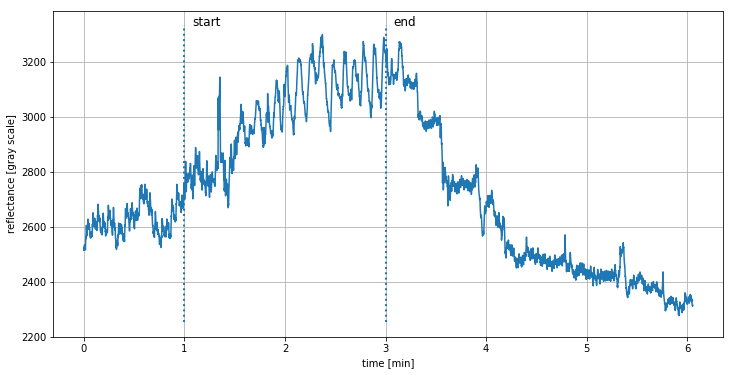

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [1200, 3600]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 7265, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 7265, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

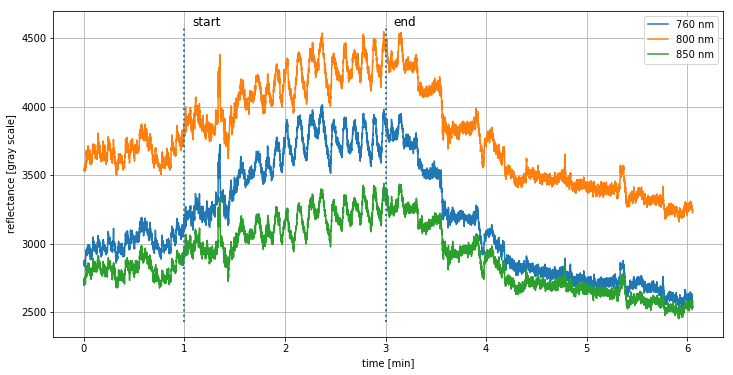

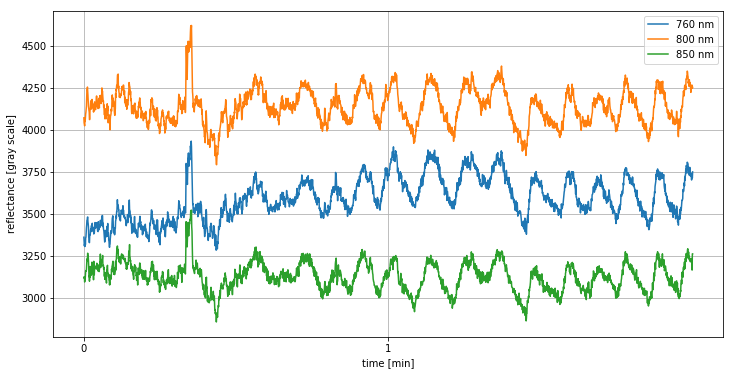

In [38]:
plt.figure(figsize=(12, 6))
base = 660
s_time = 1200
e_time = 3600
total_time = 7265

wl_select = [760, 800, 850]
wl_select = [i-base for i in wl_select]
for i in wl_select:
    plt.plot(data[:, i], label="{} nm".format(i+base))
    
    
for text, time in zip(["start", "end"], [s_time, e_time]):
    plt.plot(
        [time, time], 
        [data[:, wl_select].min()*0.99, data[:, wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[:, wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, total_time, 1200)], labels=[str(int(i/1200)) for i in range(0, total_time, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

# 去除800 nm的變化
plt.figure(figsize=(12, 6))
imf = EMD().emd(data[s_time:e_time, 800-base])
ratio = imf[-1]/imf[-1].mean()
plt.plot(data[s_time:e_time, 760-base]/ratio, label="760 nm")
plt.plot(data[s_time:e_time, 800-base]/ratio, label="800 nm")
plt.plot(data[s_time:e_time, 850-base]/ratio, label="850 nm")

plt.xticks([i for i in range(0, e_time-s_time, 1200)], labels=[str(int(i/1200)) for i in range(0, e_time-s_time, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()


## 閉氣

In [39]:
data = np.loadtxt("data/raw/{}/IJV/live/live_4_1.csv".format(date), delimiter=",")
calib_wl = np.loadtxt("data/raw/{}/IJV/calib_wl.csv".format(date), delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (8438, 261)


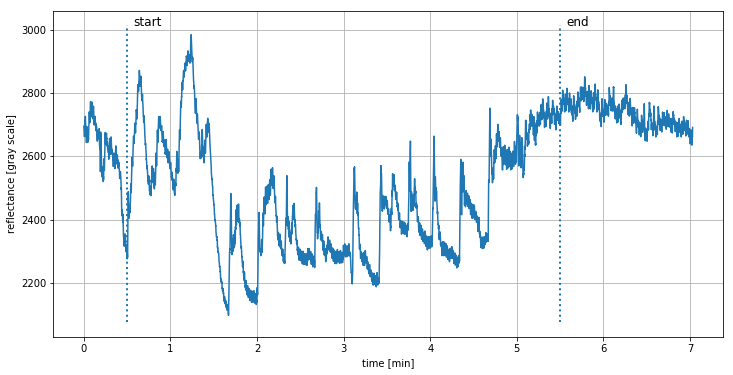

In [40]:
plt.figure(figsize=(12, 6))
s_time = 600
e_time = 6600
total_time = 8438

plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [600, 6600]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, total_time, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, total_time, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

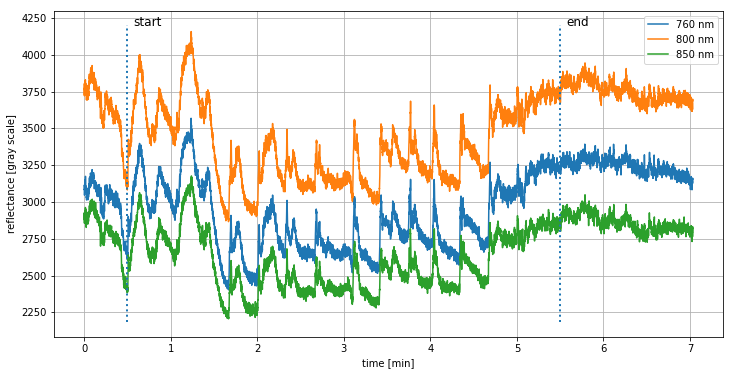

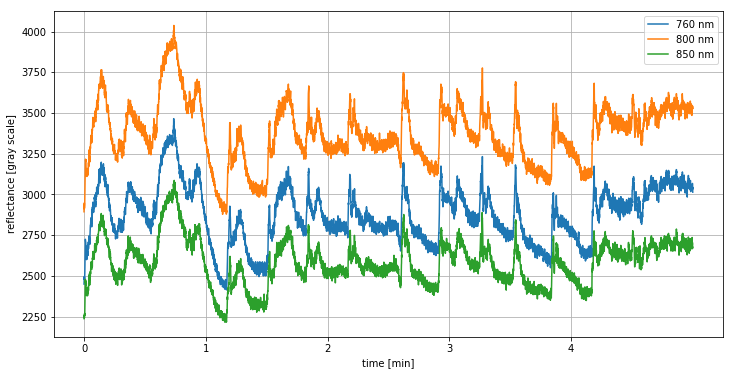

In [41]:
plt.figure(figsize=(12, 6))
base = 660
s_time = 600
e_time = 6600
total_time = 8438

wl_select = [760, 800, 850]
wl_select = [i-base for i in wl_select]
for i in wl_select:
    plt.plot(data[:, i], label="{} nm".format(i+base))
    
    
for text, time in zip(["start", "end"], [s_time, e_time]):
    plt.plot(
        [time, time], 
        [data[:, wl_select].min()*0.99, data[:, wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[:, wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, total_time, 1200)], labels=[str(int(i/1200)) for i in range(0, total_time, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

# 去除800 nm的變化
plt.figure(figsize=(12, 6))
imf = EMD().emd(data[s_time:e_time, 800-base])
ratio = imf[-1]/imf[-1].mean()
plt.plot(data[s_time:e_time, 760-base]/ratio, label="760 nm")
plt.plot(data[s_time:e_time, 800-base]/ratio, label="800 nm")
plt.plot(data[s_time:e_time, 850-base]/ratio, label="850 nm")

plt.xticks([i for i in range(0, e_time-s_time, 1200)], labels=[str(int(i/1200)) for i in range(0, e_time-s_time, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()